# Goutham Selvakumar
# DSC 478 (Assignment 4)
1. PCA for Reduced Dimensionality in Clustering
a. [5 pts] Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [1]:
#Importing the Packages
#Running it
import pandas as pd
import numpy as np
from numpy import *
from numpy import linalg as la
import pdb
import pylab as pl
from matplotlib import cm
from matplotlib import pyplot as plt
#Importing sci-kit learn
#Running it
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition

In [2]:
#Reading the files of data, class, and names
segmentation_data = pd.read_table("C:/Users/admin/Desktop/segmentation_data.txt", delimiter =",", header = None)
segmentation_class = pd.read_table("C:/Users/admin/Desktop/segmentation_classes.txt", header = None)
segmentation_names = pd.read_table("C:/Users/admin/Desktop/segmentation_names.txt", header = None)

In [3]:
#Segmentation data is provided
segmentation_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
##Segmentation class is provided
segmentation_class.head()

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [5]:
#Segmentation names is provided
segmentation_names.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


In [6]:
#Info on Segmentation_data
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2100 non-null   float64
 1   1       2100 non-null   float64
 2   2       2100 non-null   int64  
 3   3       2100 non-null   float64
 4   4       2100 non-null   float64
 5   5       2100 non-null   float64
 6   6       2100 non-null   float64
 7   7       2100 non-null   float64
 8   8       2100 non-null   float64
 9   9       2100 non-null   float64
 10  10      2100 non-null   float64
 11  11      2100 non-null   float64
 12  12      2100 non-null   float64
 13  13      2100 non-null   float64
 14  14      2100 non-null   float64
 15  15      2100 non-null   float64
 16  16      2100 non-null   float64
 17  17      2100 non-null   float64
 18  18      2100 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 311.8 KB


In [7]:
#Info on Segmentation_class
segmentation_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2100 non-null   object
 1   1       2100 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.9+ KB


In [8]:
#Info on Segmentation_names
segmentation_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes


In [9]:
#Using the favorite method 
#Sklearn's min-max scaler
min_max_scaler = MinMaxScaler()

In [10]:
#Normalizing the Image data
segmentation_data_norm = min_max_scaler.fit_transform(segmentation_data)

In [11]:
segmentation_data_norm

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])

b. [10 pts] Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visualization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [12]:
#Performing the K-Means with 
#n_clusters = 7
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) 

In [13]:
#Fitting the k_means
kmeans.fit(segmentation_data_norm)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 506.35737740375237.
Iteration 1, inertia 373.86650793537837.
Iteration 2, inertia 369.631799194094.
Iteration 3, inertia 369.2095008978527.
Iteration 4, inertia 368.6663783510166.
Iteration 5, inertia 367.7229314338777.
Iteration 6, inertia 367.111898373278.
Iteration 7, inertia 366.68471105856787.
Iteration 8, inertia 366.0995217094406.
Iteration 9, inertia 365.14649803404444.
Iteration 10, inertia 363.94430569725864.
Iteration 11, inertia 362.1112597508931.
Iteration 12, inertia 360.3518922653296.
Iteration 13, inertia 357.72950987839454.
Iteration 14, inertia 354.88692508781503.
Iteration 15, inertia 352.61226671223596.
Iteration 16, inertia 351.6400682938731.
Iteration 17, inertia 351.338077062855.
Iteration 18, inertia 351.0321366298228.
Iteration 19, inertia 350.65014384299496.
Iteration 20, inertia 350.17113660916476.
Iteration 21, inertia 350.0500996895915.
Iteration 22, inertia 350.0266720088565.
Iteration 23, inertia 350.0218614771

KMeans(max_iter=500, n_clusters=7, verbose=1)

In [14]:
clusters = kmeans.predict(segmentation_data_norm)

In [15]:
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,5
1,5
2,5
3,5
4,5
...,...
2095,6
2096,0
2097,3
2098,3


In [16]:
#Printing the centroids of the cluster 
pd.options.display.float_format='{:,.2f}'.format
#Centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=segmentation_names)
centroids.T

,0,1,2,3,4,5,6
"(REGION-CENTROID-COL,)",0.25,0.54,0.75,0.77,0.30,0.51,0.25
"(REGION-CENTROID-ROW,)",0.39,0.15,0.53,0.43,0.53,0.81,0.46
"(REGION-PIXEL-COUNT,)",0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(SHORT-LINE-DENSITY-5,)",0.08,0.03,0.04,0.01,0.05,0.08,0.03
"(SHORT-LINE-DENSITY-2,)",0.02,0.00,0.04,0.02,0.05,0.01,0.01
"(VEDGE-MEAN,)",0.08,0.03,0.11,0.04,0.10,0.05,0.04
"(VEDGE-SD,)",0.00,0.00,0.02,0.00,0.01,0.00,0.00
"(HEDGE-MEAN,)",0.06,0.03,0.11,0.02,0.08,0.05,0.03
"(HEDGE-SD,)",0.01,0.00,0.02,0.00,0.01,0.00,0.00
"(INTENSITY-MEAN,)",0.15,0.82,0.30,0.04,0.40,0.11,0.03


In [17]:
def cluster_sizes(clusters):  
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    for c in cluster_labels:
        size[c] = len(segmentation_data_norm[clusters == c])
    return size

In [18]:
size = cluster_sizes(clusters)
for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  336
Size of Cluster 1 =  300
Size of Cluster 2 =  332
Size of Cluster 3 =  309
Size of Cluster 4 =  236
Size of Cluster 5 =  297
Size of Cluster 6 =  290


In [19]:
#Performing the Silhouette analysis on the clusters
silhouettes = metrics.silhouette_samples(segmentation_data_norm, clusters)
print(silhouettes[:20])

[0.5723009  0.56096434 0.46537332 0.49555343 0.57184728 0.55971567
 0.54254115 0.41198301 0.52007116 0.46772731 0.48697578 0.49143895
 0.58398756 0.5624969  0.37898897 0.53116773 0.5484396  0.42267617
 0.41603628 0.40351227]


In [20]:
print(silhouettes.mean())

0.3320233761933512


In [21]:
def plot_silhouettes(data, clusters, metric='euclidean'):
#Importing the necessary packages to run
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)
        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 
    pl.yticks(cticks, cluster_labels)
#Title for X and Y labels
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')
    pl.tight_layout()
#Plotting the silhoutte scores
    pl.show()
    return

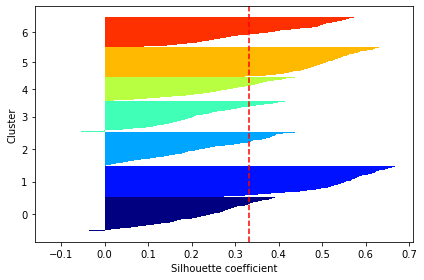

In [22]:
#Plotting the silhoutte scores
plot_silhouettes(segmentation_data_norm, clusters)

In [23]:
#Importing the packages and running it
from sklearn.metrics import completeness_score, homogeneity_score
#Calculating the Completeness Score of the clusters
#Calculating the homogeneity Score of the clusters
Completeness = completeness_score(segmentation_class[1],clusters)
Homogeneity = homogeneity_score(segmentation_class[1],clusters)
print ('Completeness score is {}'.format(Completeness))
print ('Homogeneity score is {}'.format(Homogeneity))

Completeness score is 0.6116744999910891
Homogeneity score is 0.6099656393147241


 c. [10 pts] Do your own experiments with the number of clusters to see if a different value of K results in more cohesive clustering based on Silhouette analysis. Please do not provide all your clustering results, but you should include the best result according to your analysis and provide a brief discussion of why this particular clustering was selected.

In [24]:
#K value is found
range_n_clusters = range(2,10)
silhouette_avg = []
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters=num_clusters, max_iter=500, verbose=1)
#Fitting the K-Means
 kmeans.fit(segmentation_data_norm)
 cluster_labels = kmeans.labels_
#Silhoutte samples (scores)
 silhouette_samples = metrics.silhouette_samples(segmentation_data_norm, cluster_labels)
 silhouette_avg.append(silhouette_samples.mean())

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 1663.5348424236975.
Iteration 1, inertia 931.9429386486809.
Iteration 2, inertia 930.6119049593497.
Iteration 3, inertia 929.8662020766086.
Iteration 4, inertia 929.5081799320824.
Iteration 5, inertia 929.4470780547612.
Iteration 6, inertia 929.3975471426347.
Iteration 7, inertia 929.3835670676499.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1351.6025647967867.
Iteration 1, inertia 930.451441401957.
Iteration 2, inertia 929.5707225834046.
Iteration 3, inertia 929.4470780547612.
Iteration 4, inertia 929.3975471426345.
Iteration 5, inertia 929.3835670676499.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2195.272431314921.
Iteration 1, inertia 1360.1785397199515.
Iteration 2, inertia 1140.3668435641366.
Iteration 3, inertia 960.9252743669286.
Iteration 4, inertia 941.1765845211594.
Iteration 5, inertia 935.9384581388582.
Iteration 6, inertia 933.73296268

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 1, inertia 682.7642736844665.
Iteration 2, inertia 677.5020299332017.
Iteration 3, inertia 677.2581211207973.
Iteration 4, inertia 677.2495213881522.
Iteration 5, inertia 677.226879670261.
Iteration 6, inertia 677.1670463094293.
Iteration 7, inertia 677.1462848302875.
Iteration 8, inertia 677.1124863271762.
Iteration 9, inertia 677.0637063092317.
Iteration 10, inertia 677.0212315201688.
Iteration 11, inertia 676.9815433955646.
Iteration 12, inertia 676.9608629944317.
Iteration 13, inertia 676.9525471260584.
Converged at iteration 13: center shift 2.1745698435405196e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 874.9727435442092.
Iteration 1, inertia 703.7378701424477.
Iteration 2, inertia 702.7270411114004.
Iteration 3, inertia 702.6754664136979.
Iteration 4, inertia 702.6722171136829.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1110.615607468194.
Iteration 1, inertia 803.6796208106836.


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 3, inertia 486.85696043430596.
Converged at iteration 3: center shift 7.803912474555859e-07 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 873.7371463659607.
Iteration 1, inertia 615.0590649490648.
Iteration 2, inertia 588.7907016295025.
Iteration 3, inertia 549.056395560388.
Iteration 4, inertia 496.5843780106652.
Iteration 5, inertia 487.0723270173129.
Iteration 6, inertia 486.86165439735714.
Iteration 7, inertia 486.85624011499397.
Converged at iteration 7: center shift 3.218360585369225e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 830.6420592768416.
Iteration 1, inertia 508.15693598432256.
Iteration 2, inertia 487.88690110479456.
Iteration 3, inertia 486.91074285455346.
Iteration 4, inertia 486.84807384665316.
Iteration 5, inertia 486.845131291644.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 741.201664333235.
Iteration 1, inertia 517.56403269129

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 708.3968320160058.
Iteration 1, inertia 445.4746951456626.
Iteration 2, inertia 440.598510769819.
Iteration 3, inertia 440.08968057619404.
Iteration 4, inertia 439.17498986319055.
Iteration 5, inertia 438.5408174637484.
Iteration 6, inertia 437.92264941236033.
Iteration 7, inertia 437.4737035256568.
Iteration 8, inertia 436.91834037389.
Iteration 9, inertia 435.87781812292394.
Iteration 10, inertia 435.50073388300757.
Iteration 11, inertia 435.48230392500574.
Iteration 12, inertia 435.47662337922935.
Iteration 13, inertia 435.4593215200993.
Iteration 14, inertia 435.4189800065208.
Iteration 15, inertia 435.38612562502533.
Iteration 16, inertia 435.3793271545368.
Converged at iteration 16: center shift 2.187903194066693e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 837.167893563578.
Iteration 1, inertia 446.42520632439454.
Iteration 2, inertia 434.3043101545909.
Iteration 3, inertia 431.0699634852701

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 550.028134604136.
Iteration 1, inertia 395.49333748671773.
Iteration 2, inertia 391.95870195259556.
Iteration 3, inertia 390.65057607147173.
Iteration 4, inertia 390.18452073332037.
Iteration 5, inertia 389.8672788242682.
Iteration 6, inertia 389.74550106648115.
Iteration 7, inertia 389.6657485508916.
Iteration 8, inertia 389.64038775200265.
Iteration 9, inertia 389.62218755558047.
Iteration 10, inertia 389.6171098447756.
Iteration 11, inertia 389.5983400743455.
Iteration 12, inertia 389.58328795305925.
Iteration 13, inertia 389.5702538717331.
Iteration 14, inertia 389.5546837381313.
Iteration 15, inertia 389.47520576030394.
Iteration 16, inertia 389.3704211889979.
Iteration 17, inertia 389.3139289319369.
Iteration 18, inertia 389.27644556234316.
Converged at iteration 18: center shift 3.7565541618652897e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 585.5321237955469.
Iteration 1, inertia 417.593159

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 513.3512032470427.
Iteration 1, inertia 376.3372596554453.
Iteration 2, inertia 368.9341811872792.
Iteration 3, inertia 367.3347555731443.
Iteration 4, inertia 367.03929552407465.
Iteration 5, inertia 366.9761051638492.
Iteration 6, inertia 366.9570116467999.
Iteration 7, inertia 366.9522891183732.
Iteration 8, inertia 366.94966277449987.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 556.5362053109758.
Iteration 1, inertia 388.53273714418714.
Iteration 2, inertia 383.1919287094628.
Iteration 3, inertia 379.6060156715949.
Iteration 4, inertia 375.65904893722285.
Iteration 5, inertia 369.3889299358727.
Iteration 6, inertia 365.5669660216637.
Iteration 7, inertia 363.08151485922434.
Iteration 8, inertia 358.0602579210988.
Iteration 9, inertia 355.1277060726354.
Iteration 10, inertia 353.5780531362414.
Iteration 11, inertia 352.8236056923115.
Iteration 12, inertia 351.7076825098565.
Iteration 13, iner

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 470.3810003536013.
Iteration 1, inertia 359.7805219447818.
Iteration 2, inertia 344.81831885533387.
Iteration 3, inertia 334.7348500198881.
Iteration 4, inertia 332.689529106285.
Iteration 5, inertia 332.0570415668926.
Iteration 6, inertia 331.7850852030373.
Iteration 7, inertia 331.7125687892854.
Iteration 8, inertia 331.6903658622018.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 495.3468419721079.
Iteration 1, inertia 368.57477356329673.
Iteration 2, inertia 358.8536332629562.
Iteration 3, inertia 349.4410085670714.
Iteration 4, inertia 346.5795836430056.
Iteration 5, inertia 345.9517358916455.
Iteration 6, inertia 345.7711893344998.
Iteration 7, inertia 345.6516998100584.
Iteration 8, inertia 345.5752505568301.
Iteration 9, inertia 345.52304384690456.
Iteration 10, inertia 345.49373438196585.
Iteration 11, inertia 345.4879368028088.
Converged at iteration 11: center shift 3.2117488475673164e-0

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 0, inertia 458.80118456789774.
Iteration 1, inertia 337.41813040139846.
Iteration 2, inertia 325.64129947280475.
Iteration 3, inertia 320.5644976809759.
Iteration 4, inertia 318.36641682119017.
Iteration 5, inertia 317.4039123591714.
Iteration 6, inertia 316.88845469672515.
Iteration 7, inertia 316.3425145207166.
Iteration 8, inertia 315.2498152692685.
Iteration 9, inertia 312.3794512028222.
Iteration 10, inertia 309.7257709053657.
Iteration 11, inertia 309.5228524757163.
Iteration 12, inertia 309.5031725564369.
Iteration 13, inertia 309.4989179577498.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 471.93769641180575.
Iteration 1, inertia 353.48055580130523.
Iteration 2, inertia 338.29977639133176.
Iteration 3, inertia 329.85394755198126.
Iteration 4, inertia 326.7441932910433.
Iteration 5, inertia 324.0422396654699.
Iteration 6, inertia 320.57395023035366.
Iteration 7, inertia 317.3817105967318.
Iteration 8, inertia 315.0713015308

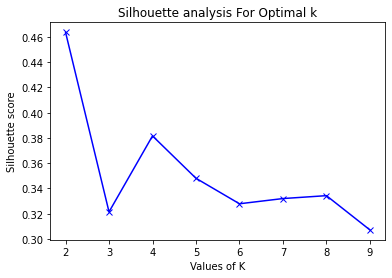

In [25]:
#Plotting between the K value and Silhoutte Score
plt.plot(range_n_clusters,silhouette_avg, 'bx-')
#X-label - Values of K
plt.xlabel("Values of K")
#Y-label - Silhouette Score
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

The highest silhouette score is given to K=2 as it has about 0.46 score from the plot.

d. [10 pts] Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a Scree plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.

In [26]:
#Performing PCA on the image
PCA = decomposition.PCA()
segmentation_data_trans = PCA.fit(segmentation_data_norm).transform(segmentation_data_norm)

In [27]:
np.set_printoptions(precision=2,suppress=True, 
                    edgeitems=5, linewidth=120)

In [28]:
print(segmentation_data_trans)

[[-0.69  0.53  0.25 -0.2  -0.08 ...  0.    0.   -0.    0.    0.  ]
 [-0.67  0.51  0.34 -0.17 -0.04 ... -0.   -0.    0.   -0.    0.  ]
 [-0.71  0.77 -0.16 -0.01 -0.17 ... -0.   -0.    0.    0.    0.  ]
 [-0.73  0.51  0.5  -0.06 -0.14 ... -0.   -0.   -0.    0.    0.  ]
 [-0.64  0.53  0.3  -0.18 -0.02 ... -0.   -0.    0.    0.    0.  ]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 ...  0.   -0.    0.   -0.   -0.  ]
 [-0.5  -0.26  0.38  0.15  0.03 ...  0.    0.    0.   -0.   -0.  ]
 [-0.51 -0.13 -0.08  0.1  -0.03 ... -0.   -0.   -0.    0.   -0.  ]
 [-0.48 -0.09 -0.16  0.11  0.   ...  0.   -0.   -0.    0.   -0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02 ...  0.   -0.   -0.    0.   -0.  ]]


In [29]:
#Printing the PCA variance ratio
print(PCA.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


In [30]:
#Analyzing the Principal Components
varPercentage = PCA.explained_variance_ratio_*100

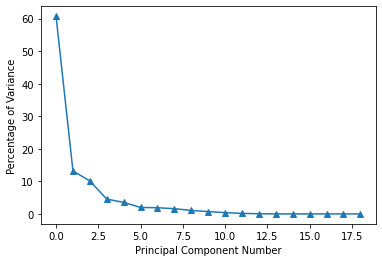

In [31]:
#Plotting the %variance and Principal Component Number
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(19), varPercentage[:], marker='^')
#X-label for Principal Component Number
plt.xlabel('Principal Component Number')
#y-label for %variance
plt.ylabel('Percentage of Variance')
#Plotting the points
plt.show()

The 95% of the variance in the data have been captured by 6 Principal Components.

In [32]:
#Reduced data
DT_trans_reduced = segmentation_data_trans[:,:6]

In [33]:
print(DT_trans_reduced)

[[-0.69  0.53  0.25 -0.2  -0.08  0.05]
 [-0.67  0.51  0.34 -0.17 -0.04  0.06]
 [-0.71  0.77 -0.16 -0.01 -0.17  0.04]
 [-0.73  0.51  0.5  -0.06 -0.14  0.03]
 [-0.64  0.53  0.3  -0.18 -0.02  0.05]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 -0.01]
 [-0.5  -0.26  0.38  0.15  0.03 -0.2 ]
 [-0.51 -0.13 -0.08  0.1  -0.03 -0.03]
 [-0.48 -0.09 -0.16  0.11  0.   -0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02 -0.21]]


e. [5 pts] Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.

In [34]:
#Using K-Means for the lower dimensional transformed data
k_means = KMeans(n_clusters =7,max_iter=500, verbose=1)

In [35]:
k_means.fit(segmentation_data_trans)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 559.4859477770676.
Iteration 1, inertia 377.0060618229603.
Iteration 2, inertia 371.581882309834.
Iteration 3, inertia 370.01258512024214.
Iteration 4, inertia 369.5515414875032.
Iteration 5, inertia 369.4637527778182.
Iteration 6, inertia 369.45193563204464.
Iteration 7, inertia 369.41531992169115.
Iteration 8, inertia 369.38886843670207.
Iteration 9, inertia 369.32865891320415.
Iteration 10, inertia 369.14114792683125.
Iteration 11, inertia 368.8675486275784.
Iteration 12, inertia 368.45360907394297.
Iteration 13, inertia 368.0661681467462.
Iteration 14, inertia 367.81065961223857.
Iteration 15, inertia 367.64767065116285.
Iteration 16, inertia 367.5937361811224.
Iteration 17, inertia 367.579620030702.
Converged at iteration 17: center shift 3.082570388713687e-06 within tolerance 4.150156953284627e-06.
Initialization complete
Iteration 0, inertia 506.6923930932133.
Iteration 1, inertia 376.445824224008.
Iteration 2, inertia 357.29030925373

KMeans(max_iter=500, n_clusters=7, verbose=1)

In [36]:
PC_clusters = k_means.predict(segmentation_data_trans)

In [37]:
#Showing the clusters in PC
PC_clusters

array([3, 3, 3, 3, 3, ..., 4, 6, 0, 0, 6])

In [38]:
#Implementing the Silhoutte Values,
#Completeness Values, and
#Homogeneity values
#Compare between them

In [39]:
PC_silhouettes = metrics.silhouette_samples(segmentation_data_trans, PC_clusters)
print(PC_silhouettes[:20])

[0.57 0.56 0.47 0.5  0.57 0.56 0.54 0.41 0.52 0.47 0.49 0.49 0.58 0.56 0.38 0.53 0.55 0.42 0.42 0.4 ]


In [40]:
#For Silhoutte 
print(PC_silhouettes.mean())

0.33202337619297806


In [41]:
#Completeness Score
PC_Completeness_score = completeness_score(segmentation_class[1],PC_clusters)
PC_Completeness_score

0.6116744999910889

In [42]:
#Homogeneity Score
PC_Homogeneity_score = homogeneity_score(segmentation_class[1], PC_clusters)
PC_Homogeneity_score

0.609965639314724

In [43]:
#Comparison with part b
print("Without using the PCA")
print("Silhouette Score: {}".format(silhouettes.mean()))
print("Completeness Ccore: {}".format(completeness_score))
print("Homogeneity Score: {}".format(homogeneity_score))
print("With using the PCA")
print("Silhouette Score: {}".format(PC_silhouettes.mean()))
print("Completeness Ccore: {}".format(PC_Completeness_score))
print("Homogeneity Score: {}".format(PC_Homogeneity_score))

Without using the PCA
Silhouette Score: 0.3320233761933512
Completeness Ccore: <function completeness_score at 0x000001F793187040>
Homogeneity Score: <function homogeneity_score at 0x000001F79316CF70>
With using the PCA
Silhouette Score: 0.33202337619297806
Completeness Ccore: 0.6116744999910889
Homogeneity Score: 0.609965639314724


2. a. [15 pts] Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures. Note the differences. Use the standard item-based collaborative filtering (based on the rating prediction function "standEst"). Next, find the top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version (using "svdEst" as the prediction engine) to generate these recommendations. Note the differences. When outputting recommendations, you should show both the id and the text of the recommended jokes (in decreasing order of predicted rating) as well as the predicted ratings for each.

In [44]:
#Loading the necessary files and running them
jest_data = pd.read_csv("C:/Users/admin/Desktop/modified_jester_data.csv", header = None)
jokes = pd.read_csv("C:/Users/admin/Desktop//jokes.csv", header = None, usecols=[1])

In [45]:
#Loading the descriptions of Jester_data
jest_data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60


In [46]:
#Info
jest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  

In [47]:
#Shape of the Jester file
jest_data.shape

(1000, 100)

In [48]:
jokes.head()

,1
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,Q. What's the difference between a man and a t...
4,Q. What's O. J. Simpson's Internet address? A....


In [49]:
#Info on Jokes
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [50]:
#Shape of the Jokes files
jokes.shape

(100, 1)

In [51]:
#Implementing the Pearson and Cosine
#Similarity measures
def euclidSim(in_A,in_B):
    return 1.0 / (1.0 + la.norm(in_A - in_B))
def pearsonSim(in_A,in_B):
    if len(in_A) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(in_A, in_B, rowvar = 0)[0][1]
def cosineSim(in_A,in_B):
    num = float(in_A.T * in_B)
    denom = la.norm(in_A)*la.norm(in_B)
    return 0.5 + 0.5 * (num / denom)

In [52]:
#Using the Standard item-based collaborative filtering
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [53]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
#The sig4 is arranged into a diagonal matrix
    Sig4 = mat(eye(4)*Sigma[:4]) 
    xformedItems = data.T * U[:,:4] * Sig4.I 
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [54]:
def recommend(dataMat, user, N=3, simMeas=cosineSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [55]:
jest_matrix = np.matrix(jest_data)
user = 4

In [56]:
cos_recomm = recommend(jest_matrix, user, N=5, simMeas=cosineSim, estMethod=standEst)
cos_recomm

[(71, 14.293754381681563),
 (75, 14.293605672411005),
 (79, 14.293063319114747),
 (78, 14.2908339103558),
 (70, 14.287092374768891)]

In [57]:
#Pearson
pear_recomm = recommend(jest_matrix, user, N=5, simMeas=pearsonSim, estMethod=standEst)
pear_recomm

[(71, 14.413443009309447),
 (75, 14.397311198445264),
 (79, 14.382511887413443),
 (78, 14.356160763938075),
 (72, 14.334361485417928)]

In [58]:
#Finding the top 5 recommendations for user
def top_N_jokes(data, jokes, user, N, Means, Method):
    recom_jokes = recommend(data, user, N, simMeas=Means, estMethod=Method)
    if(recom_jokes=='you rated everything'):
        return;
#Printing the recommendations
    print("Recomemndations are: ",recom_jokes)
#Printing for user id 25  
    print('Top 5 jokes for user with id 25 are:')
    for i in range(len(recom_jokes)):
        print("\t"," JOKE : (",recom_jokes[i][0],") - ",
              jokes[1][recom_jokes[i][0]],
              '\n\t RATING (Predicted) = ',recom_jokes[i][1],'\n')
    print('\n\n')

In [59]:
#Pearson Similarity for StandEst
top_N_jokes(jest_matrix, jokes,25, 5,pearsonSim , standEst)

Recomemndations are:  [(99, 15.324673571007686), (71, 15.324296950553675), (97, 15.322105340570541), (82, 15.301730225022272), (91, 15.294030630051065)]
Top 5 jokes for user with id 25 are:
	  JOKE : ( 99 ) -  Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 
	 RATING (Predicted) =  15.324673571007686 

	  JOKE : ( 71 ) -  On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?" 
	 RATING (Predicted) =  15.324296950553675 

	  J

In [60]:
#Pearson Similarity for SVD
top_N_jokes(jest_matrix, jokes,25, 5,pearsonSim , svdEst)

Recomemndations are:  [(3, 15.277088154749473), (79, 15.238062599769163), (72, 15.209188661833458), (71, 15.18502140590189), (99, 15.180560799732316)]
Top 5 jokes for user with id 25 are:
	  JOKE : ( 3 ) -  Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it. 
	 RATING (Predicted) =  15.277088154749473 

	  JOKE : ( 79 ) -  Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy." 
	 RATING (Predicted) =  15.238062599769163 

	  JOKE : ( 72 ) -  Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the 

b. [15 pts] Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function) and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function (in both cases using Pearson similarity measure. Note that this may take several minutes depending on your computational environment. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [61]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    num_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(num_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    with_held_items = rated_items_by_user[test_indices]
    orig_user_profile = np.copy(dataMat[user])
    dataMat[user, with_held_items] = 0 
    error_u = 0.0
    count_u = len(with_held_items)
#Absolute error is computed 
    for item in with_held_items:
#The rating is estimated based on the withheld item
        esti_Score = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(esti_Score - orig_user_profile[item])
#From the withheld items, now restoring
#Ratings to the user profile
#Also, for the user returning both the sum of abs errors and count of test cases
    for item in with_held_items:
        dataMat[user, item] = orig_user_profile[item]
    return error_u, count_u

In [62]:
#Using this function, all users are iterated and evaluated 
#Using the cross_validate_user fn
def test(dataMat, test_ratio, Method, Means):
#The number of users 
    users = len(dataMat)
    total_error=0
    total_count_u =0
    for user in range(users):
        error_u, count_u = cross_validate_user(dataMat, user, test_ratio, estMethod=Method, simMeas=Means)
        total_error += error_u
        total_count_u += count_u
#Calculating the MAE and returning the values 
    MAE = total_error/total_count_u
    return MAE;

In [63]:
%%time
#MAE (std)
std_MAE = test(jest_matrix,0.2, standEst, pearsonSim)

CPU times: total: 17min 4s
Wall time: 1min 43s


In [64]:
#MAE for standard estimate
print("MAE for standard estimate is: {}".format(std_MAE))

MAE for standard estimate is: 3.739999840360228


In [ ]:
%%time
#MAE (svd)
svd_MAE = test(jest_matrix,0.2, svdEst, pearsonSim)

In [ ]:
#MAE for SVD estimate
print("MAE for SVD estimate is: {}".format(svd_MAE))

c. [15 pts] Write a new function "print_most_similar_jokes" which outputs the most similar jokes (based on user ratings) to a specified query joke. You function should take as input the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function. It should output the text of the query joke as well as the texts of the top k most similar jokes in decreasing order of similarity (you should also provide the similarity values). Test your function as follows:
 * Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.
 * Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

In [ ]:
def knn_search(query_ratings_vector, dataMat, k, metric=cosineSim):
    ratings_df = pd.DataFrame(query_ratings_vector)
    data = pd.DataFrame(dataMat)
    distances = []
#Each joke from the data are compared 
#With the rating vector
    for i in range(dataMat.shape[1]):
        data_rating_vector = dataMat[:,i]
        distances.append(metric(query_ratings_vector, data_rating_vector))  
    distances_arr = np.array(distances);
    distances_arr = distances_arr.argsort()   
    kNeighbors = zeros((k,dataMat.shape[1]))
    topIndicies = []
    classCount={}
    for i in range(k):
        kNeighbors[i,:] = dataMat[distances_arr[i],:]
        topIndicies.append(distances_arr[i])
    return kNeighbors, topIndicies

In [ ]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    print(' Query joke id',queryJoke, 'query joke =',jokes[queryJoke])
    kNeighbors, topIndicies = knn_search(dataMat[:,queryJoke], dataMat, k , metric)
    print ("The top %d recommended jokes are: "%(k))
    for ind in topIndicies:
        jok = jokes[ind]
        print()
        print ("#",ind," => ",jok)
    return

In [ ]:
#Showing the top 3 most similar jokes using Pearson similarity
print_most_similar_jokes(jest_matrix,jokes[1],9,3,pearsonSim)

In [ ]:
#Show the top 3 most similar jokes using Cosine Similarity
print_most_similar_jokes(jest_matrix,jokes[1],9,3,cosineSim)

d. [15 pts] The implementation of item-based collaborative filtering provided in the module is not scalable since for each prediction it attempts to compute pairwise similarities among all items. Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure such as a pairwise similarity matrix. Your training function should be able to use different similarity functions (passed as a parameter) including cosine Similarity or Pearson correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities matrix computed in the training phase. It should then return the predicted rating on the target item for the target user. The predicted rating should be the weighted average of the target user's ratings on the k most similar items to the target item (obtained from the similarity matrix). Demonstrate that your function works by computing predicted ratings for users 4 and 25, using k = 10, on top two items recommended to each user on part a (using both Pearson and cosine similarities).

In [ ]:
def training_model(item_index, dataMat, metric):
    query_ratings_vector = dataMat[:,item_index]
    ratings_df = pd.DataFrame(query_ratings_vector)
    data = pd.DataFrame(dataMat)
    distances = {}
    dist_arr = []
    similar_item_arr = []
    count = 0
#Each joke from the data are compared 
#With the rating vector
    for i in range(dataMat.shape[1]):
#Set the sim as 0, if the current item is same as i/p item
        if (i==item_index):
            dist_arr.append(0)
        else:
            data_rating_vector = dataMat[:,i]
            dist_arr.append(metric(query_ratings_vector, data_rating_vector))
        similar_item_arr.append(i)
    distances[item_index] = { 'distance' : dist_arr, 'items' : similar_item_arr}
    return distances

In [ ]:
def prepare_training_model(dataMat, metric):
    distances = {}
    for i in range(dataMat.shape[1]):
        distances.update(training_model(i,dataMat,metric))
    return distances

In [ ]:
%%time
tpercent = 0.8
tsize = int(tpercent * len(jest_matrix))
#training dataset is set to 80%
train_data_set = jest_matrix[:tsize,:] 
#training dataset is set to 20%
test_data_set = jest_matrix[tsize:,:] 

In [ ]:
def test(user,item,k,ds):
    user_df = pd.DataFrame(user)
    if(k==0):
        return np.array(user_df[item])[0],[] 
#distance info 
#item
    distance = ds[item]['distance']
#Distances are sorted   
    idx = np.argsort(distance)
    top_k = idx[:k]
    ratings = np.array(user_df[top_k])
    dist = sum(ratings)/k
    return dist,top_k

In [ ]:
#Using the Cosine Similarity
#Part A and User 4
values = prepare_training_model(train_data_set, cosineSim)
np.set_printoptions(precision=2,suppress=True)
item = 71
#K = 4
K = 10
user_number = 4
user = test_data_set[user_number]
pred_rating,top_k = test(user,item,K,values)
user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using cosine similarity.')

In [ ]:
#Using the Pearson Similarity
#Part A and User 4
values = prepare_training_model(train_data_set, pearsonSim)
np.set_printoptions(precision=2,suppress=True)
item = 71
#K = 10
K = 10
user_number = 4
user = test_data_set[user_number]
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)
user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using pearson similarity.')

In [ ]:
#Using the Cosine Similarity
#Part A and User 25
np.set_printoptions(precision=2,suppress=True)
item = 99
#K = 10
K = 10
user_number = 25
user = test_data_set[user_number]
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)
user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using cosine similarity.')

In [ ]:
#Using the Pearson Similarity
#Part A and User 25
np.set_printoptions(precision=2,suppress=True)
item = 71
#K = 10
K = 10
user_number = 4
user = test_data_set[user_number]
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)
user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using pearson similarity.')

e. [Extra Credit - 10 pts] Modify the "cross_validate_user" and  "test" functions as necessary to use the new version of the prediction function (from part d). First test the prediction accuracy of your prediction function (similarly to part b, above) using both cosine and Pearson similarity measures. Next, provide a plot of cross-validation accuracies across a range of values of k. (running the "test" function for each value of k). Your plot may look similar to this example. Next, Modify the "recommend" function to use your new prediction function. Using the best observed value of k from your plot demonstrate the functionality of your recommender by generating top 3 recommendations for users 4 and 25.

In [ ]:
def cross_validate_user_modified(dataMat, user, predicted_rating,item):
    dataMat = np.array(dataMat)
    original_user_profile = np.copy(dataMat[user])
    original_user_rating = original_user_profile[item]
    error_u = abs(original_user_rating - predicted_rating)
#Sum of abs errors and count of test cases are returned
#Computing MAE
    return error_u

In [ ]:
error = cross_validate_user_modified(test_data_set,user_number,pred_rating,item)
print("error ",error)
print(test_data_set.shape[1]) 